# Code Written by:
**Shweta Tiwari**
*20 Oct 2023*

## Algorithm:  Dijkstra

In [1]:
import time

In [2]:
from heapq import heappush, heappop
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Algorithm

In [3]:
%%time
def dijkstra(graph, source):
    distance = {}
    queue = [(0, source)]

    while queue:
        # shortest unexplored path
        p, v = heappop(queue)
        if v in distance:
            continue

        # shortest path (source, ..., v)
        print('({}, ..., {}) = {}'.format(source, v, p))
        distance[v] = p

        # extend path to (source, ..., v, u)
        for _, u, e in graph.edges(v, data=True):
            heappush(queue, (p + e['weight'], u))

    return distance

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.3 µs


## Graph

In [4]:
%%time
n = 20
graph = nx.Graph()
graph.add_nodes_from(range(n))
for u, v in np.random.randint(0, n, (n, 2)):
    graph.add_edge(u, v, weight=abs(u - v))

CPU times: user 425 µs, sys: 96 µs, total: 521 µs
Wall time: 4.03 ms


CPU times: user 78.3 ms, sys: 30.8 ms, total: 109 ms
Wall time: 104 ms


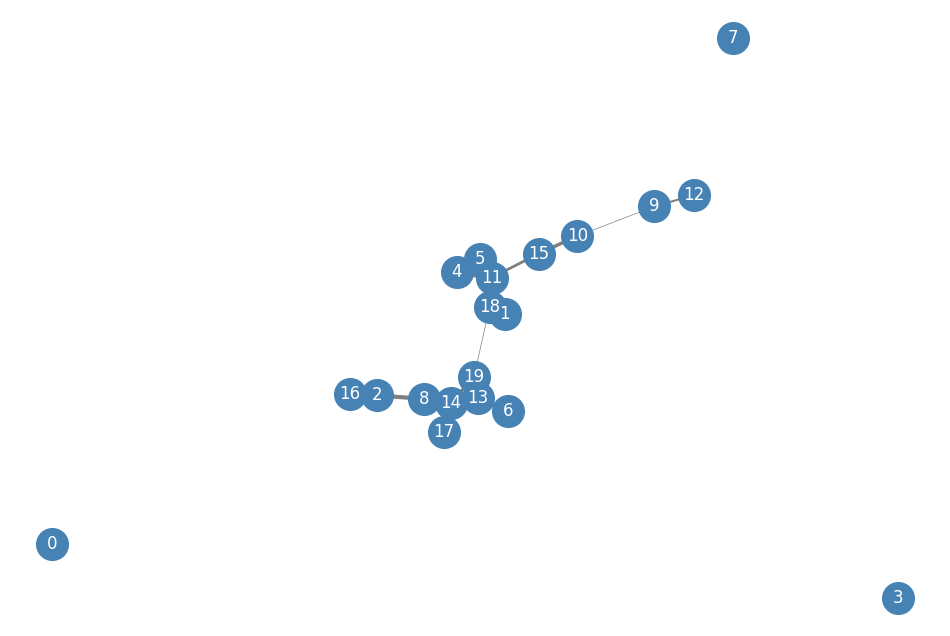

In [5]:
%%time
weights = [e['weight'] / n * 10  for (u, v, e) in graph.edges(data=True)]

plt.figure(figsize=(12, 8))
plt.axis('off')

layout = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=520)
nx.draw_networkx_edges(graph, layout, edge_color='gray', width=weights)
nx.draw_networkx_labels(graph, layout, font_color='white')

None

# Run

In [6]:
%%time
distances = dijkstra(graph, 0)

(0, ..., 0) = 0
CPU times: user 1.16 ms, sys: 1.06 ms, total: 2.21 ms
Wall time: 2.43 ms


# The End